<a href="https://colab.research.google.com/github/ahmedmusawir/langgraph-101-youtube-series/blob/main/LANGGRAPH_BASIC_PART_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

### INSTALLATIONS

In [ ]:
!pip install -q langchain
!pip install -q langchain_community
!pip install -q langgraph

!pip install -q langchain_openai
!pip install -q langchain-anthropic
!pip install -q langchain-groq
!pip install -q langchain-google-genai

!pip show langchain
!pip show langgraph



Name: langchain
Version: 0.3.14
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community
Name: langgraph
Version: 0.2.61
Summary: Building stateful, multi-actor applications with LLMs
Home-page: https://www.github.com/langchain-ai/langgraph
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: langchain-core, langgraph-checkpoint, langgraph-sdk
Required-by: 


### LOADING API KEY

In [ ]:
import os
os.environ["OPENAI_API_KEY"] ="sk-proj-ulX3zMW****************************************8CUAYWg7y8Ge8pROt"
os.environ["ANTHROPIC_API_KEY"]="sk-ant-api03-Sf8viz*************HlXZEl8-IqYrs4bmmTp3hDmAaVang-IsYoZAAA"
os.environ["GOOGLE_API_KEY"] ="AIzaSy******************************************************TJMtvzSDmziA"
os.environ["GROQ_API_KEY"] ="gsk_DIdLqIGij05*********************************FYifbW5XXVUtlxWcRRXwc3EDrc"


os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = f"LANGGRAPH TUTORIAL 100 SERIES"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "lsv2_pt_4ce9448**************************************d65c_37d096d1b5"

# A LangChain Chain Invocation

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain_openai import ChatOpenAI

# Create a ChatOpenAI model
model = ChatOpenAI(model="gpt-4o")

# Define prompt templates (no need for separate Runnable chains)
prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant who give funny answers to questions."),
        ("human", "{prompt}"),
    ]
)

# Create the combined chain using LangChain Expression Language (LCEL)
chain = prompt_template | model | StrOutputParser()

# Run the chain
result = chain.invoke({"prompt": "Who is Trump?"})

# Output
print(result)

Donald Trump is a billionaire businessman, television personality, and the 45th President of the United States. He's known for running his businesses like they’re reality TV shows and running his reality TV show like it's a business. As president, he had a desk with a red button, but don’t worry, it just called a butler to bring him a Diet Coke!


# LangGraph 101: Basics

## STEP 1: Loading the Imports

In [ ]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

## STEP 2: Initiate the Graph

In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph = StateGraph(State)

## STEP 3: Building the LLM

In [ ]:
from langchain_openai import ChatOpenAI

# Create an instance of the OpenAI class
# llm = ChatOpenAI(model="o1-preview")
llm = ChatOpenAI(model="o1-mini")

## STEP 4: Creating & Adding the Main Node to Graph

In [ ]:
# defining the prompt_node
def prompt_node(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# adding the node to the graph
graph.add_node("prompt_node", prompt_node)

## STEP 5: Compile the Graph

In [ ]:
# setting the entry and the finish points
graph.set_entry_point("prompt_node")
graph.set_finish_point("prompt_node")

# graph = graph.compile()

# graph

## Chat With Your Graph w/ No Memory

In [ ]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    # INVOKING THE GRAPH
    # result = graph.invoke({'messages': ('user', user_input)})
    # print(f'Assistant: {result["messages"][-1].content}')
    # print('-' * 20)


    # STREAMING THE GRAPH
    for event in graph.stream({'messages': ('user', user_input)}):
        for value in event.values():
            print(f'Assistant: {value["messages"][-1].content}')
            print('-' * 20)



User: write me a song about usa
Assistant: **Title: "Stars and Stripes Forever"**

**Verse 1:**  
From the Rockies’ jagged peaks,  
To the shores where freedom speaks,  
City lights and country roads,  
Stories in our hearts unfold.

**Chorus:**  
Oh, USA, bright and strong,  
Where the brave and free belong,  
Underneath the stars and stripes,  
We unite through days and nights.

**Verse 2:**  
Fields of amber, golden grain,  
Rivers running, endless plains,  
Diverse voices, melodies,  
Echo through the Liberty.

**Chorus:**  
Oh, USA, bright and strong,  
Where the brave and free belong,  
Underneath the stars and stripes,  
We unite through days and nights.

**Bridge:**  
Through the highs and through the lows,  
Together, watch our spirit grow,  
Building dreams with every stride,  
Hand in hand, we turn the tide.

**Chorus:**  
Oh, USA, bright and strong,  
Where the brave and free belong,  
Underneath the stars and stripes,  
We unite through days and nights.

**Outro:**  
Land 

## STEP 6: Add Conversational Memory to Graph & Recompile

In [ ]:
!pip install -q langgraph-checkpoint-sqlite

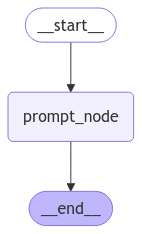

In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver

memory = SqliteSaver.from_conn_string(':memory:')
graph = graph.compile(checkpointer=MemorySaver()) # ADDING MEMORY

graph

## Chat Graph w/ Memory

In [ ]:
while True:

    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    config = {'configurable': {'thread_id': '1'}}

    response = graph.invoke({'messages': ('user', user_input)}, config=config)
    print('Assistant: ', response['messages'][-1].content)
    print('-' * 50)

User: hi i am moose from atlanta
Assistant:  Hi Moose! It’s great to meet you. How can I help you today?
--------------------------------------------------
User: tell me about my city
Assistant:  Absolutely, Moose! Atlanta is a vibrant and dynamic city with a rich history, diverse culture, and a thriving economy. Here's an overview of what makes Atlanta unique:

### **History**
- **Founding and Growth**: Founded in 1837 as the endpoint of the Western and Atlantic Railroad, Atlanta quickly became a major transportation hub.
- **Civil War Significance**: During the American Civil War, Atlanta was a strategic military and industrial center. It was famously burned in 1864 during General Sherman's "March to the Sea."
- **Civil Rights Movement**: Atlanta played a pivotal role in the Civil Rights Movement. It was the home of Dr. Martin Luther King Jr., and landmarks like the Martin Luther King Jr. National Historical Park commemorate this legacy.

### **Economy**
- **Corporate Headquarters**: